# National Health and Nutrition Examination Survey

### 2009 - 2010 Data Documentation, Codebook and Frequencies

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pandas as pd
import missingno as msno

In [2]:
metademo = {
    "SEQN": "Respondent sequence number",
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age in years"
}

metacbc = {
    'LBXWBCSI':('White blood cell count','10³ cells/uL'),
    'LBXLYPCT':('Lymphocyte percent','%'),
    'LBXMOPCT':('Monocyte percent','%'),
    'LBXNEPCT':('Segmented neutrophils percent','%'),
    'LBXEOPCT':('Eosinophils percent','%'),
    'LBXBAPCT':('Basophils percent','%'),
    'LBDLYMNO':('Lymphocyte number','10³ cells/uL'),
    'LBDMONO':('Monocyte number','10³ cells/uL'),
    'LBDNENO':('Segmented neutrophils number','10³ cells/uL'),
    'LBDEONO':('Eosinophils number','10³ cells/uL'),
    'LBDBANO':('Basophils number','10³ cells/uL'),
    'LBXRBCSI':('Red blood cell count','10⁶ cells/uL'),
    'LBXHGB':('Hemoglobin','g/dL'),
    'LBXHCT':('Hematocrit','%'),
    'LBXMCVSI':('Mean cell volume','fL'),
    'LBXMCHSI':('Mean cell hemoglobin','pg'),
    'LBXMC':('Mean cell hemoglobin concentration','g/dL'),
    'LBXRDW':('Red cell distribution width','%'),
    'LBXPLTSI':('Platelet count','10³ cells/uL'),
    'LBXMPSI':('Mean platelet volume','fL')
}

metabio = {
    "LBXSAL":("Albumin","g/dL"),
    "LBDSALSI":("Albumin","g/L"),
    "LBXSATSI":("Alanine aminotransferase (ALT)" ,"U/L"),
    "LBXSASSI":("Asparate aminotransferase (AST)", "U/L"),
    "LBXSAPSI":("Alkaline phosphotase", "U/L"),
    "LBXSBU":("Blood urea nitrogen", "mg/dL"),
    "LBXSCA":("Total calcium", "mg/dL"),
    "LBDSCASI":("Total calcium", "mmol/L"),
    "LBDSBUSI":("Blood urea nitrogen","mmol/L"),
    "LBXSCH":("Cholesterol", "mg/dL"),
    "LBDSCHSI":("Cholesterol", "mmol/L"),
    "LBXSC3SI":("Bicarbonate", "mmol/L"),
    "LBXSCR":("Creatinine", "mg/dL"),
    "LBDSCRSI":("Creatinine", "µmol/L"),
    "LBXSGTSI":("Gamma glutamyl transferase", "U/L)"),
    "LBXSGL":("Glucose, serum", "mg/dL"),
    "LBDSGLSI":("Glucose, serum", "mmol/L"),
    "LBXSIR":("Iron, refigerated", "ug/dL"),
    "LBDSIRSI":("Iron, refigerated", "umol/L"),
    "LBXSLDSI":("Lactate dehydrogenase LDH", "U/L"),
    "LBXSPH": ("Phosphorus", "mg/dL"),
    "LBDSPHSI":("Phosphorus", "mmol/L"),
    "LBXSTB": ("Total bilirubin", "mg/dL"),
    "LBDSTBSI": ("Bilirubin, total", "umol/L"),
    "LBXSTP": ("Total protein", "g/dL"),
    "LBDSTPSI": ("Total protein", "g/L"),
    "LBXSTR": ("Triglycerides", "mg/dL"),
    "LBDSTRSI": ("Triglycerides", "mmol/L"),
    "LBXSUA": ("Uric acid", "mg/dL"),
    "LBDSUASI": ("Uric acid", "umol/L"),
    "LBXSNASI": ("Sodium", "mmol/L"),
    "LBXSKSI": ("Potassium", "mmol/L"),
    "LBXSCLSI": ("Chloride", "mmol/L"),
    "LBXSOSSI": ("Osmolality", "mmol/Kg"),
    "LBXSGB": ("Globulin", "g/dL"),
    "LBDSGBSI": ("Globulin", "g/L")
}

---

# Complete Blood Count with 5-Part Differential (CBC)
* Category: Hematology.
* Range: 2009-2010
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2009/DataFiles/CBC_F.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

Prefixes and suffixes explained:

* LBX- = Lab sample
* -SI = [...] Count/Volume
* -PCT = [...] Percent
* -NO = [...] Number

In [3]:
cbc = pd.read_sas('CBC_F.xpt')
cbc.describe()

SEQN     LBXWBCSI     LBXLYPCT     LBXMOPCT     LBXNEPCT  \
count   9835.000000  8798.000000  8787.000000  8787.000000  8787.000000   
mean   56878.555363     7.253251    33.580187     7.916103    54.849744   
std     3044.073520     2.450944    10.588250     2.418487    11.651112   
min    51624.000000     1.400000     2.900000     0.800000     5.900000   
25%    54243.500000     5.700000    26.300000     6.300000    48.000000   
50%    56866.000000     6.900000    32.300000     7.700000    56.000000   
75%    59515.500000     8.400000    39.500000     9.200000    62.900000   
max    62160.000000    99.900000    76.400000    40.400000    93.600000   

           LBXEOPCT      LBXBAPCT     LBDLYMNO      LBDMONO      LBDNENO  ...  \
count  8.787000e+03  8.787000e+03  8786.000000  8786.000000  8786.000000  ...   
mean   3.016240e+00  6.786730e-01     2.385329     0.556715     4.050080  ...   
std    2.329171e+00  5.910713e-01     1.021991     0.200213     1.985415  ...   
min    5.397605e-79  5.397605e-79     0.400000     0.100000     0.200000  ...   
25%    1.600000e+00  4.000000e-01     1.800000     0.400000     2.900000  ...   
50%    2.400000e+00  6.000000e-01     2.200000     0.500000     3.800000  ...   
75%    3.800000e+00  8.000000e-01     2.800000     0.700000     4.900000  ...   
max    3.410000e+01  1.970000e+01    20.100000     3.800000    83.100000  ...   

            LBDBANO     LBXRBCSI       LBXHGB       LBXHCT     LBXMCVSI  \
count  8.786000e+03  8799.000000  8799.000000  8799.000000  8799.000000   
mean   3.964261e-02     4.601416    13.809797    40.271963    87.709649   
std    8.077772e-02     0.470960     1.454911     4.255255     6.169930   
min    5.397605e-79     2.380000     6.100000    20.500000    56.100000   
25%    5.397605e-79     4.280000    12.800000    37.200000    84.200000   
50%    5.397605e-79     4.580000    13.800000    40.000000    88.200000   
75%    1.000000e-01     4.910000    14.800000    43.400000    91.700000   
max    4.700000e+00     7.150000    19.500000    55.800000   116.500000   

          LBXMCHSI        LBXMC       LBXRDW    LBXPLTSI      LBXMPSI  
count  8799.000000  8799.000000  8799.000000  8799.00000  8799.000000  
mean     30.087987    34.291169    12.832072   256.29617     7.735106  
std       2.371065     0.929825     1.230663    71.92318     0.898700  
min      17.100000    29.500000     9.700000    11.00000     4.700000  
25%      28.800000    33.700000    12.100000   207.50000     7.100000  
50%      30.300000    34.300000    12.600000   247.00000     7.700000  
75%      31.500000    34.900000    13.200000   296.00000     8.200000  
max      56.200000    43.800000    31.800000  1000.00000    13.200000  

[8 rows x 21 columns]

<Axes: >

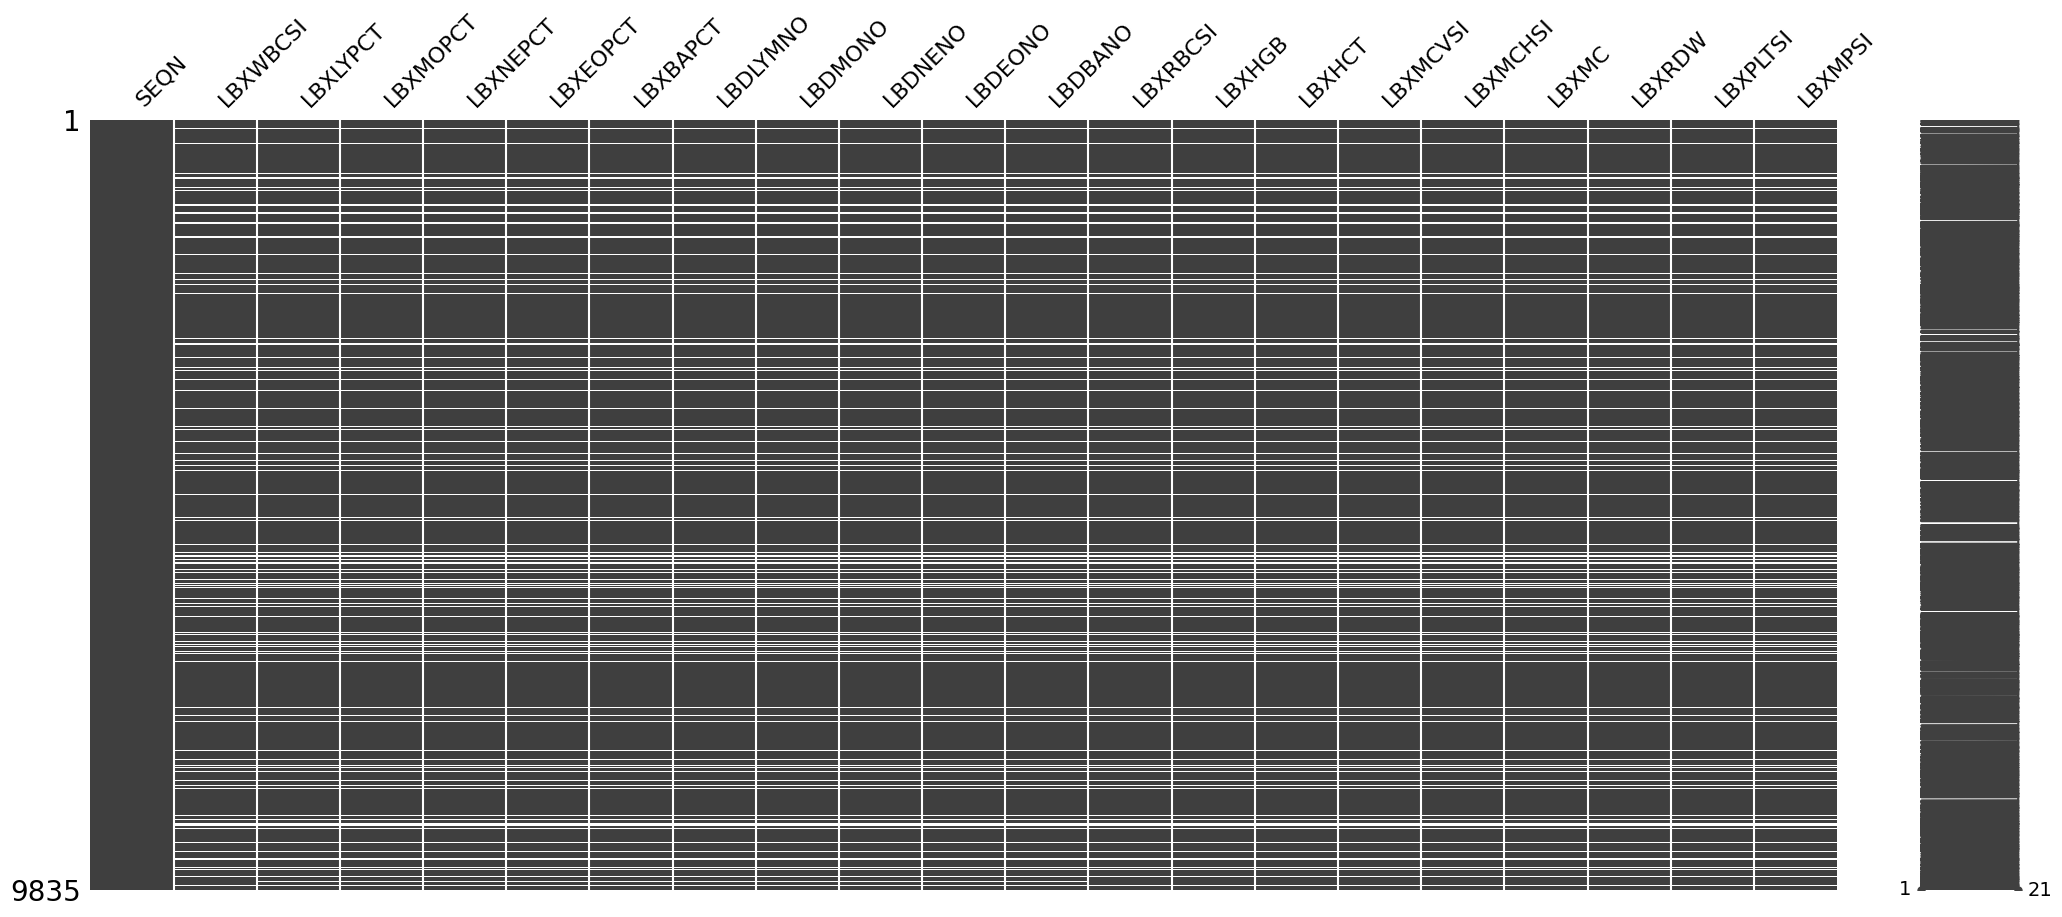

In [4]:
msno.matrix(cbc)

Missing values are not at random. Each sample falls into one of these categories:
* All values listed.
* Not a single value listed.
* Missing the concentration values of white cells subtypes.

In [5]:
cbc.loc[cbc['LBXLYPCT'].isna() & ~cbc['LBXWBCSI'].isna()]

SEQN  LBXWBCSI  LBXLYPCT  LBXMOPCT  LBXNEPCT  LBXEOPCT  LBXBAPCT  \
676   52334.0       6.9       NaN       NaN       NaN       NaN       NaN   
765   52427.0       5.8       NaN       NaN       NaN       NaN       NaN   
816   52485.0       8.5       NaN       NaN       NaN       NaN       NaN   
1069  52760.0       7.0       NaN       NaN       NaN       NaN       NaN   
1141  52837.0       6.9       NaN       NaN       NaN       NaN       NaN   
1714  53448.0      12.5       NaN       NaN       NaN       NaN       NaN   
1797  53535.0       6.5       NaN       NaN       NaN       NaN       NaN   
1937  53685.0       9.7       NaN       NaN       NaN       NaN       NaN   
4788  56727.0       6.2       NaN       NaN       NaN       NaN       NaN   
7819  59989.0       6.7       NaN       NaN       NaN       NaN       NaN   
9726  62042.0       6.9       NaN       NaN       NaN       NaN       NaN   
9821  62146.0       6.6       NaN       NaN       NaN       NaN       NaN   

      LBDLYMNO  LBDMONO  LBDNENO  ...  LBDBANO  LBXRBCSI  LBXHGB  LBXHCT  \
676        NaN      NaN      NaN  ...      NaN      4.26    12.8    35.4   
765        NaN      NaN      NaN  ...      NaN      3.74    11.0    31.3   
816        NaN      NaN      NaN  ...      NaN      4.07    13.3    37.5   
1069       NaN      NaN      NaN  ...      NaN      4.12    11.8    34.7   
1141       NaN      NaN      NaN  ...      NaN      4.84    12.9    41.3   
1714       NaN      NaN      NaN  ...      NaN      4.34     9.9    28.6   
1797       NaN      NaN      NaN  ...      NaN      4.90    15.6    44.3   
1937       NaN      NaN      NaN  ...      NaN      4.06    11.9    35.3   
4788       NaN      NaN      NaN  ...      NaN      3.95     7.0    22.7   
7819       NaN      NaN      NaN  ...      NaN      3.58    10.8    32.6   
9726       NaN      NaN      NaN  ...      NaN      5.55    10.5    34.3   
9821       NaN      NaN      NaN  ...      NaN      5.09    16.0    44.3   

      LBXMCVSI  LBXMCHSI  LBXMC  LBXRDW  LBXPLTSI  LBXMPSI  
676       83.2      30.1   36.2    13.4     210.0      8.8  
765       83.6      29.3   35.2    16.1     181.0      8.4  
816       92.0      32.5   35.3    12.1     297.0      7.1  
1069      84.3      28.6   33.9    12.5     304.0      6.3  
1141      85.2      26.6   31.3    15.4     424.0      8.8  
1714      65.8      22.8   34.6    17.3     323.0      7.7  
1797      90.4      31.9   35.3    11.7     230.0      8.1  
1937      87.1      29.1   33.5    14.4     246.0      9.6  
4788      57.5      17.7   30.8    22.7     393.0      7.3  
7819      87.1      30.1   34.6    13.5     279.0      6.6  
9726      61.8      19.0   30.7    15.2     295.0      9.5  
9821      86.8      31.5   36.3    13.0     214.0      8.1  

[12 rows x 21 columns]

Reasons why the values are missing seems to be related to the sampling practice: either not providing biospecimens, not enough volume or values below the lower limit of detection.

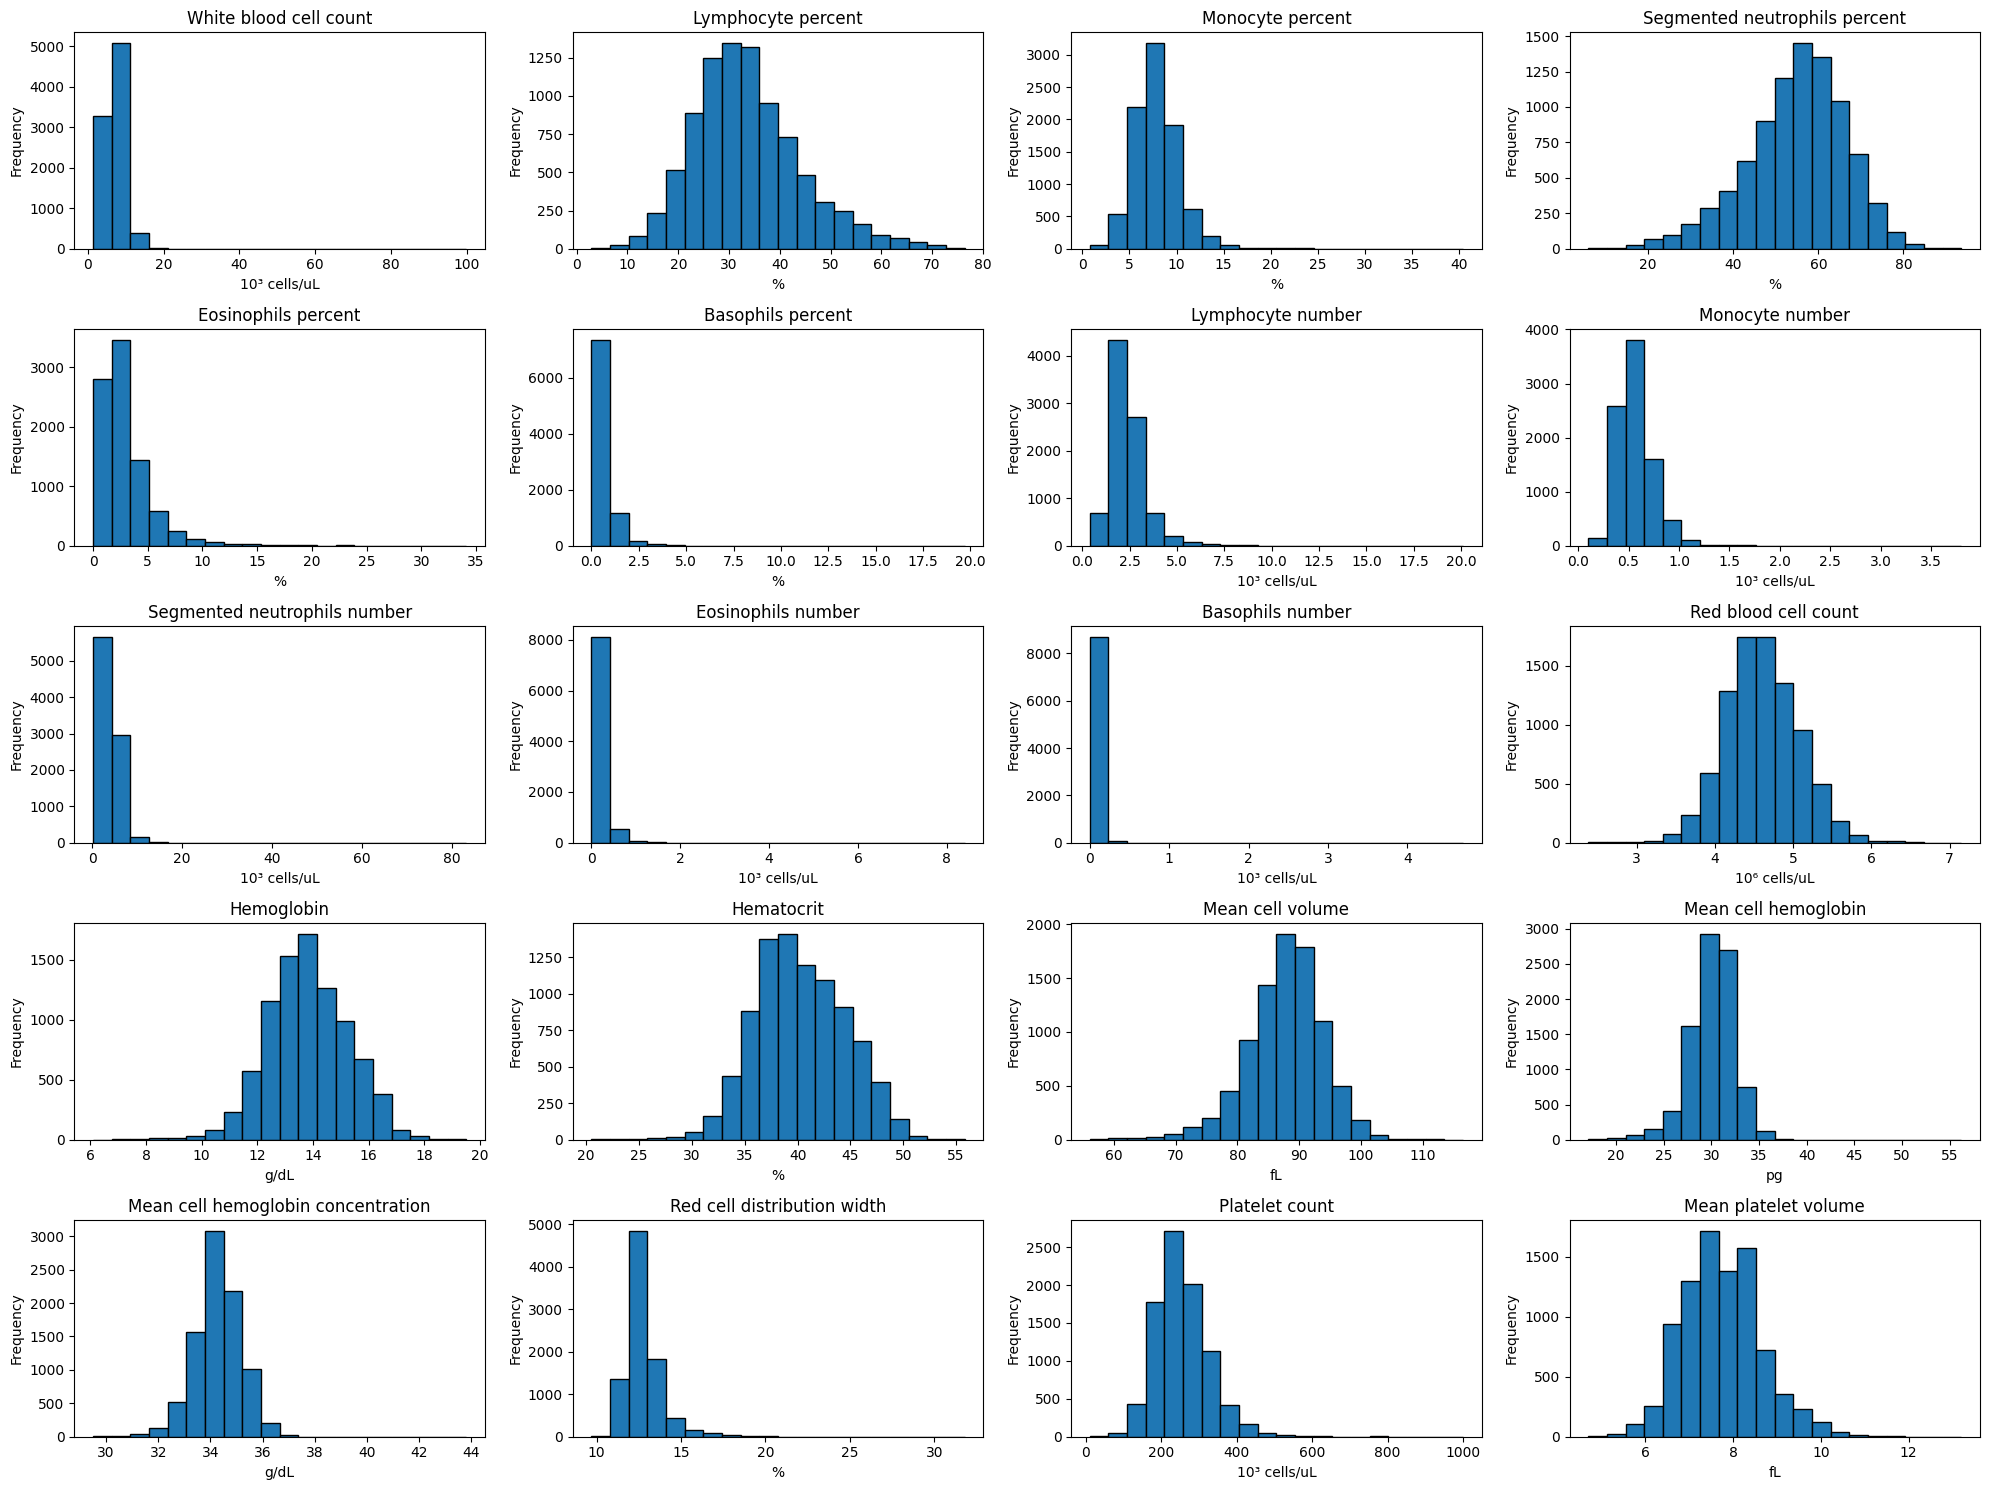

In [6]:
fig, axes = plt.subplots(5,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metacbc.items()):
    ax = axes[i]
    ax.hist(cbc[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

All values are within the lower and upper limits of detection. No apparent cases of extreme outliers.
To be determined the reference intervals from each variable.

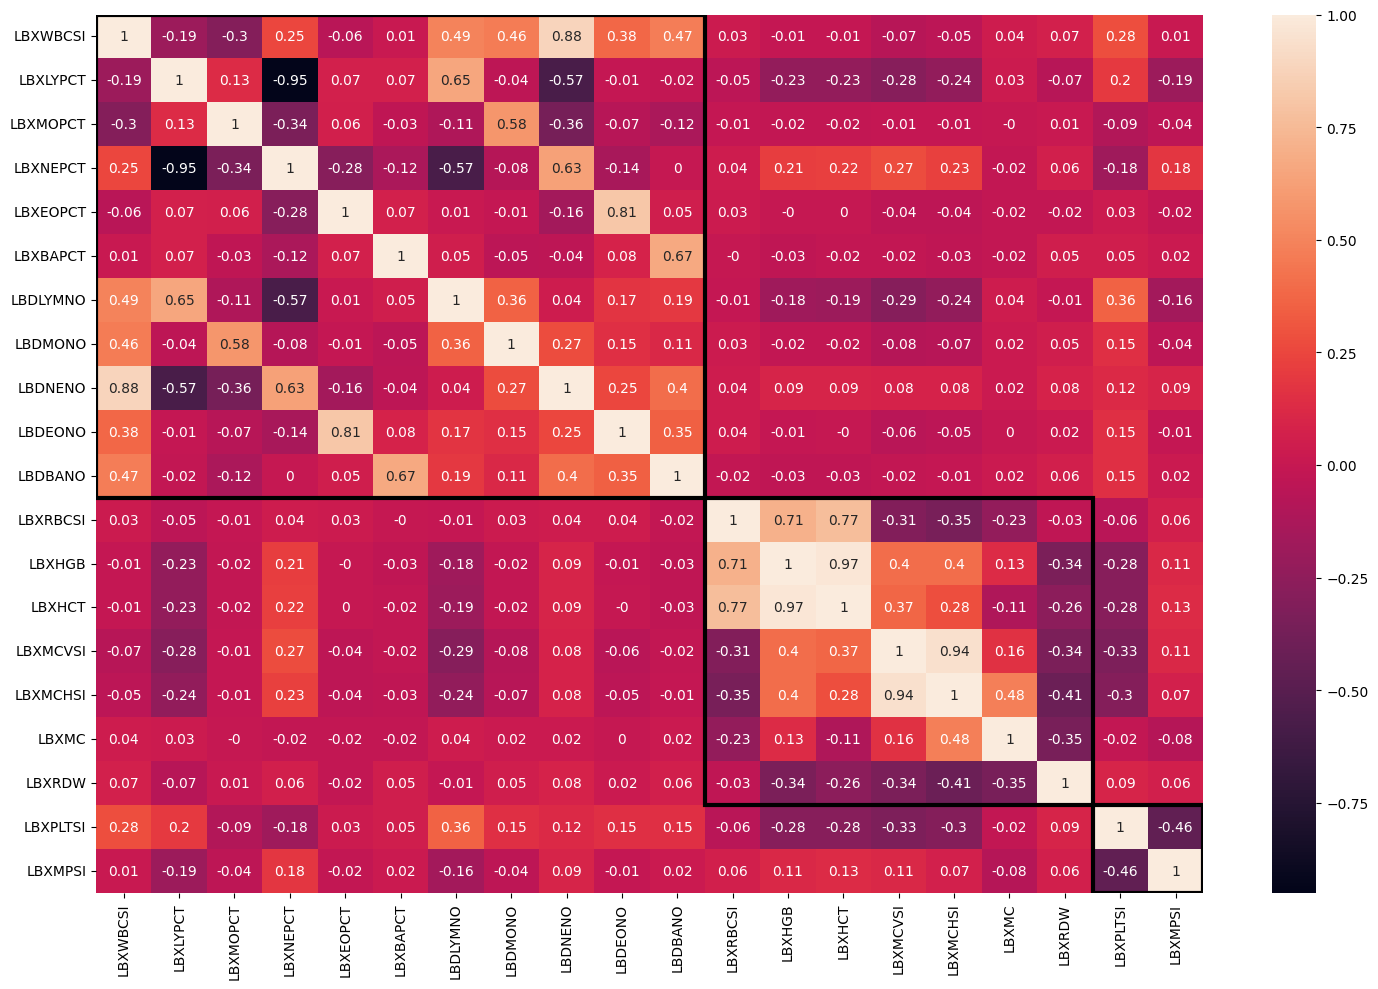

In [7]:
plt.figure(figsize=(15,10))
fig = sns.heatmap(cbc.iloc[:,1:].dropna().corr().round(2),annot=True)

whitec = Rectangle((0,0),11,11,fill=False,linewidth=3)
redc = Rectangle((11,11),7,7,fill=False,linewidth=3)
plaq = Rectangle((18,18),2,2,fill=False,linewidth=3)

for rect in [whitec,redc,plaq]:
    fig.add_patch(rect)

plt.tight_layout()
plt.show()

The three squares of interaction follow regular hematology behavior in literature:
1. White cells (upper square): white cells and subtypes.
2. Red cells (middle square): red cells and hemoglobin.
3. Plalelets (lower square): as is.

Depending on reference intervals and common use in medical literature, some variable may be dropped in order to reduce input dimensions.

---

# Standard Biochemistry Profile (BIOPRO)
* Category: Biochemistry profile.
* Range: 2009-2010
* Link: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2009/DataFiles/BIOPRO_F.htm

Based on the Beckman Coulter methodology of counting and sizing (Beckman Coulter DxH).

In [8]:
biopro = pd.read_sas('BIOPRO_F.xpt')
biopro.describe()

SEQN       LBXSAL     LBDSALSI     LBXSATSI     LBXSASSI  \
count   7369.000000  6860.000000  6860.000000  6859.000000  6858.000000   
mean   56890.184421     4.264009    42.640087    24.885552    26.051619   
std     3042.549990     0.339666     3.396661    17.837269    15.741744   
min    51624.000000     2.500000    25.000000     6.000000     8.000000   
25%    54260.000000     4.100000    41.000000    16.000000    20.000000   
50%    56913.000000     4.300000    43.000000    20.000000    23.000000   
75%    59522.000000     4.500000    45.000000    28.000000    28.000000   
max    62160.000000     5.300000    53.000000   343.000000   733.000000   

          LBXSAPSI       LBXSBU     LBDSBUSI       LBXSCA     LBDSCASI  ...  \
count  6860.000000  6860.000000  6860.000000  6860.000000  6860.000000  ...   
mean     80.259038    12.880612     4.598768     9.466706     2.366676  ...   
std      48.481479     5.779231     2.063193     0.361578     0.090394  ...   
min      10.000000     1.000000     0.360000     7.300000     1.825000  ...   
25%      56.000000     9.000000     3.210000     9.200000     2.300000  ...   
50%      69.000000    12.000000     4.280000     9.500000     2.375000  ...   
75%      87.000000    15.000000     5.360000     9.700000     2.425000  ...   
max     721.000000    90.000000    32.130000    12.100000     3.025000  ...   

            LBXSTR     LBDSTRSI       LBXSUA     LBDSUASI     LBXSNASI  \
count  6856.000000  6856.000000  6859.000000  6859.000000  6860.000000   
mean    142.687719     1.610954     5.397288   321.030879   139.353353   
std     120.191683     1.356959     1.443341    85.850116     2.104622   
min       9.000000     0.102000     0.400000    23.800000   124.000000   
25%      74.000000     0.835000     4.400000   261.700000   138.000000   
50%     113.000000     1.276000     5.300000   315.200000   139.000000   
75%     172.000000     1.942000     6.300000   374.700000   141.000000   
max    2693.000000    30.404000    13.300000   791.100000   148.000000   

           LBXSKSI     LBXSCLSI     LBXSOSSI       LBXSGB     LBDSGBSI  
count  6860.000000  6860.000000  6860.000000  6847.000000  6847.000000  
mean      3.992741   104.035569   278.216035     2.918548    29.185483  
std       0.328546     2.778117     4.845745     0.451010     4.510099  
min       2.800000    86.000000   246.000000     1.300000    13.000000  
25%       3.800000   102.000000   275.000000     2.600000    26.000000  
50%       4.000000   104.000000   278.000000     2.900000    29.000000  
75%       4.200000   106.000000   281.000000     3.200000    32.000000  
max       5.900000   114.000000   306.000000     7.500000    75.000000  

[8 rows x 37 columns]

<Axes: >

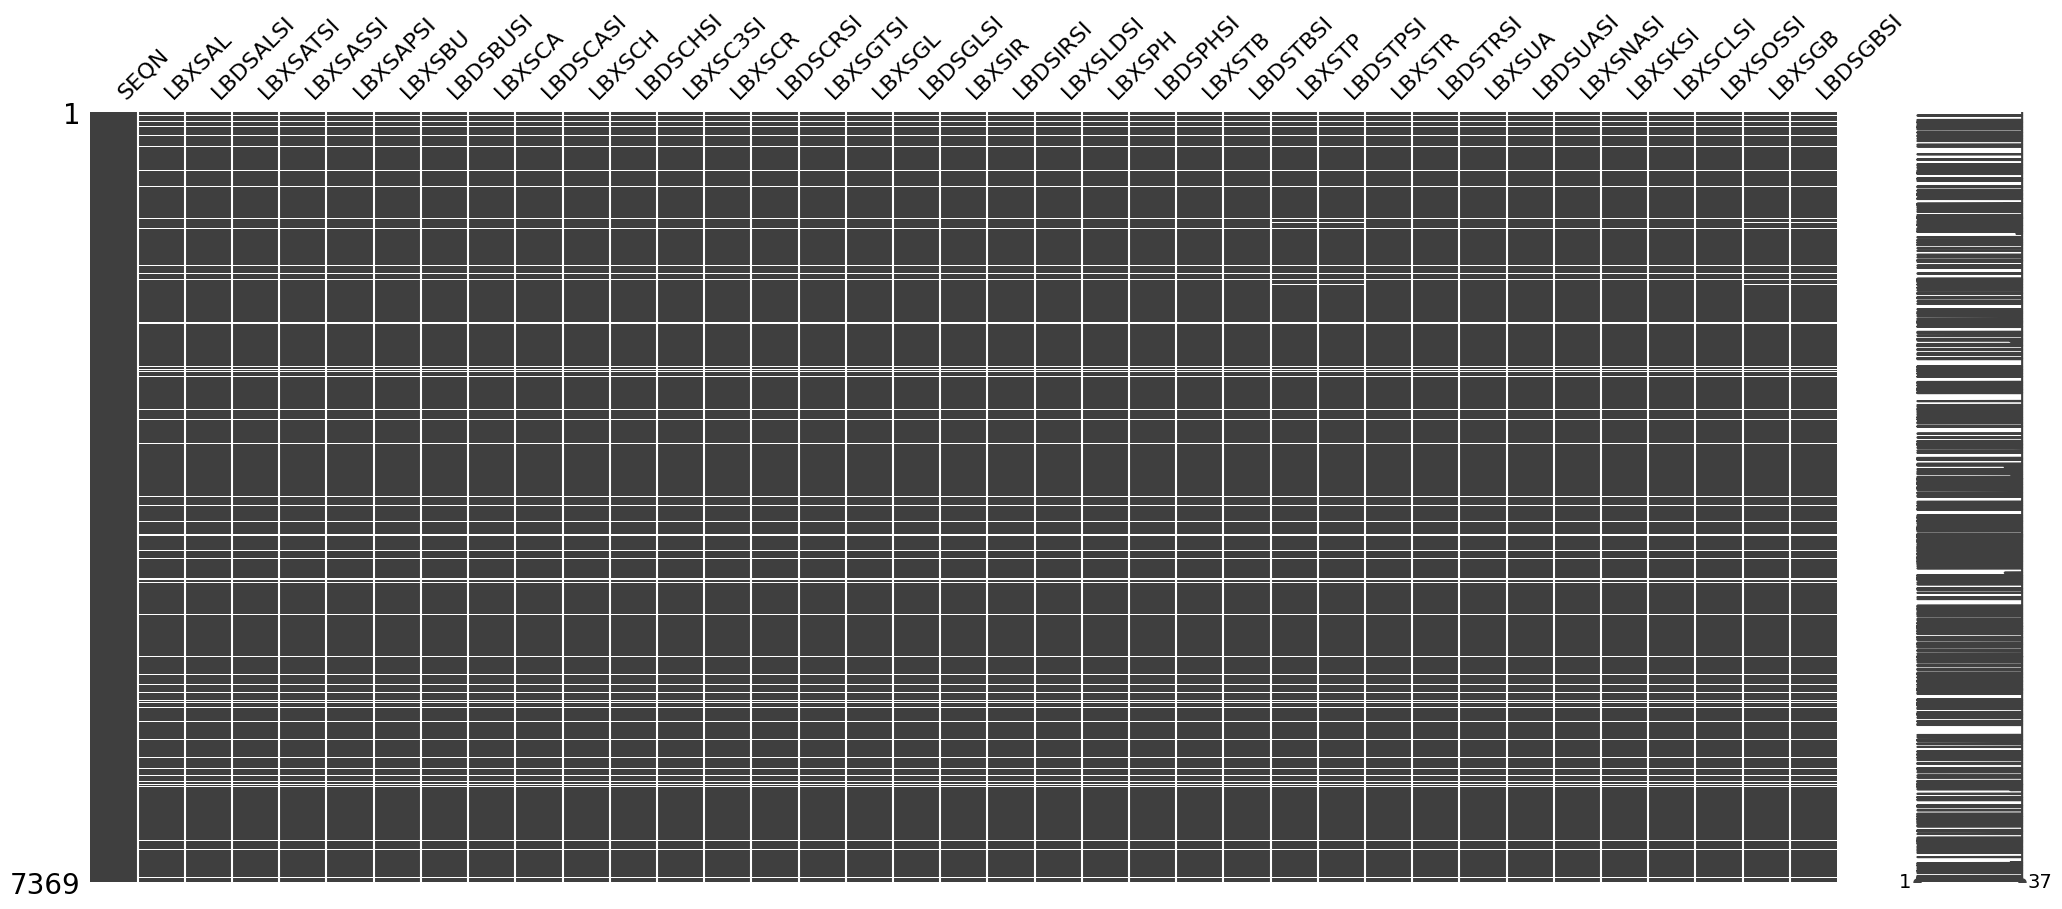

In [9]:
msno.matrix(biopro)

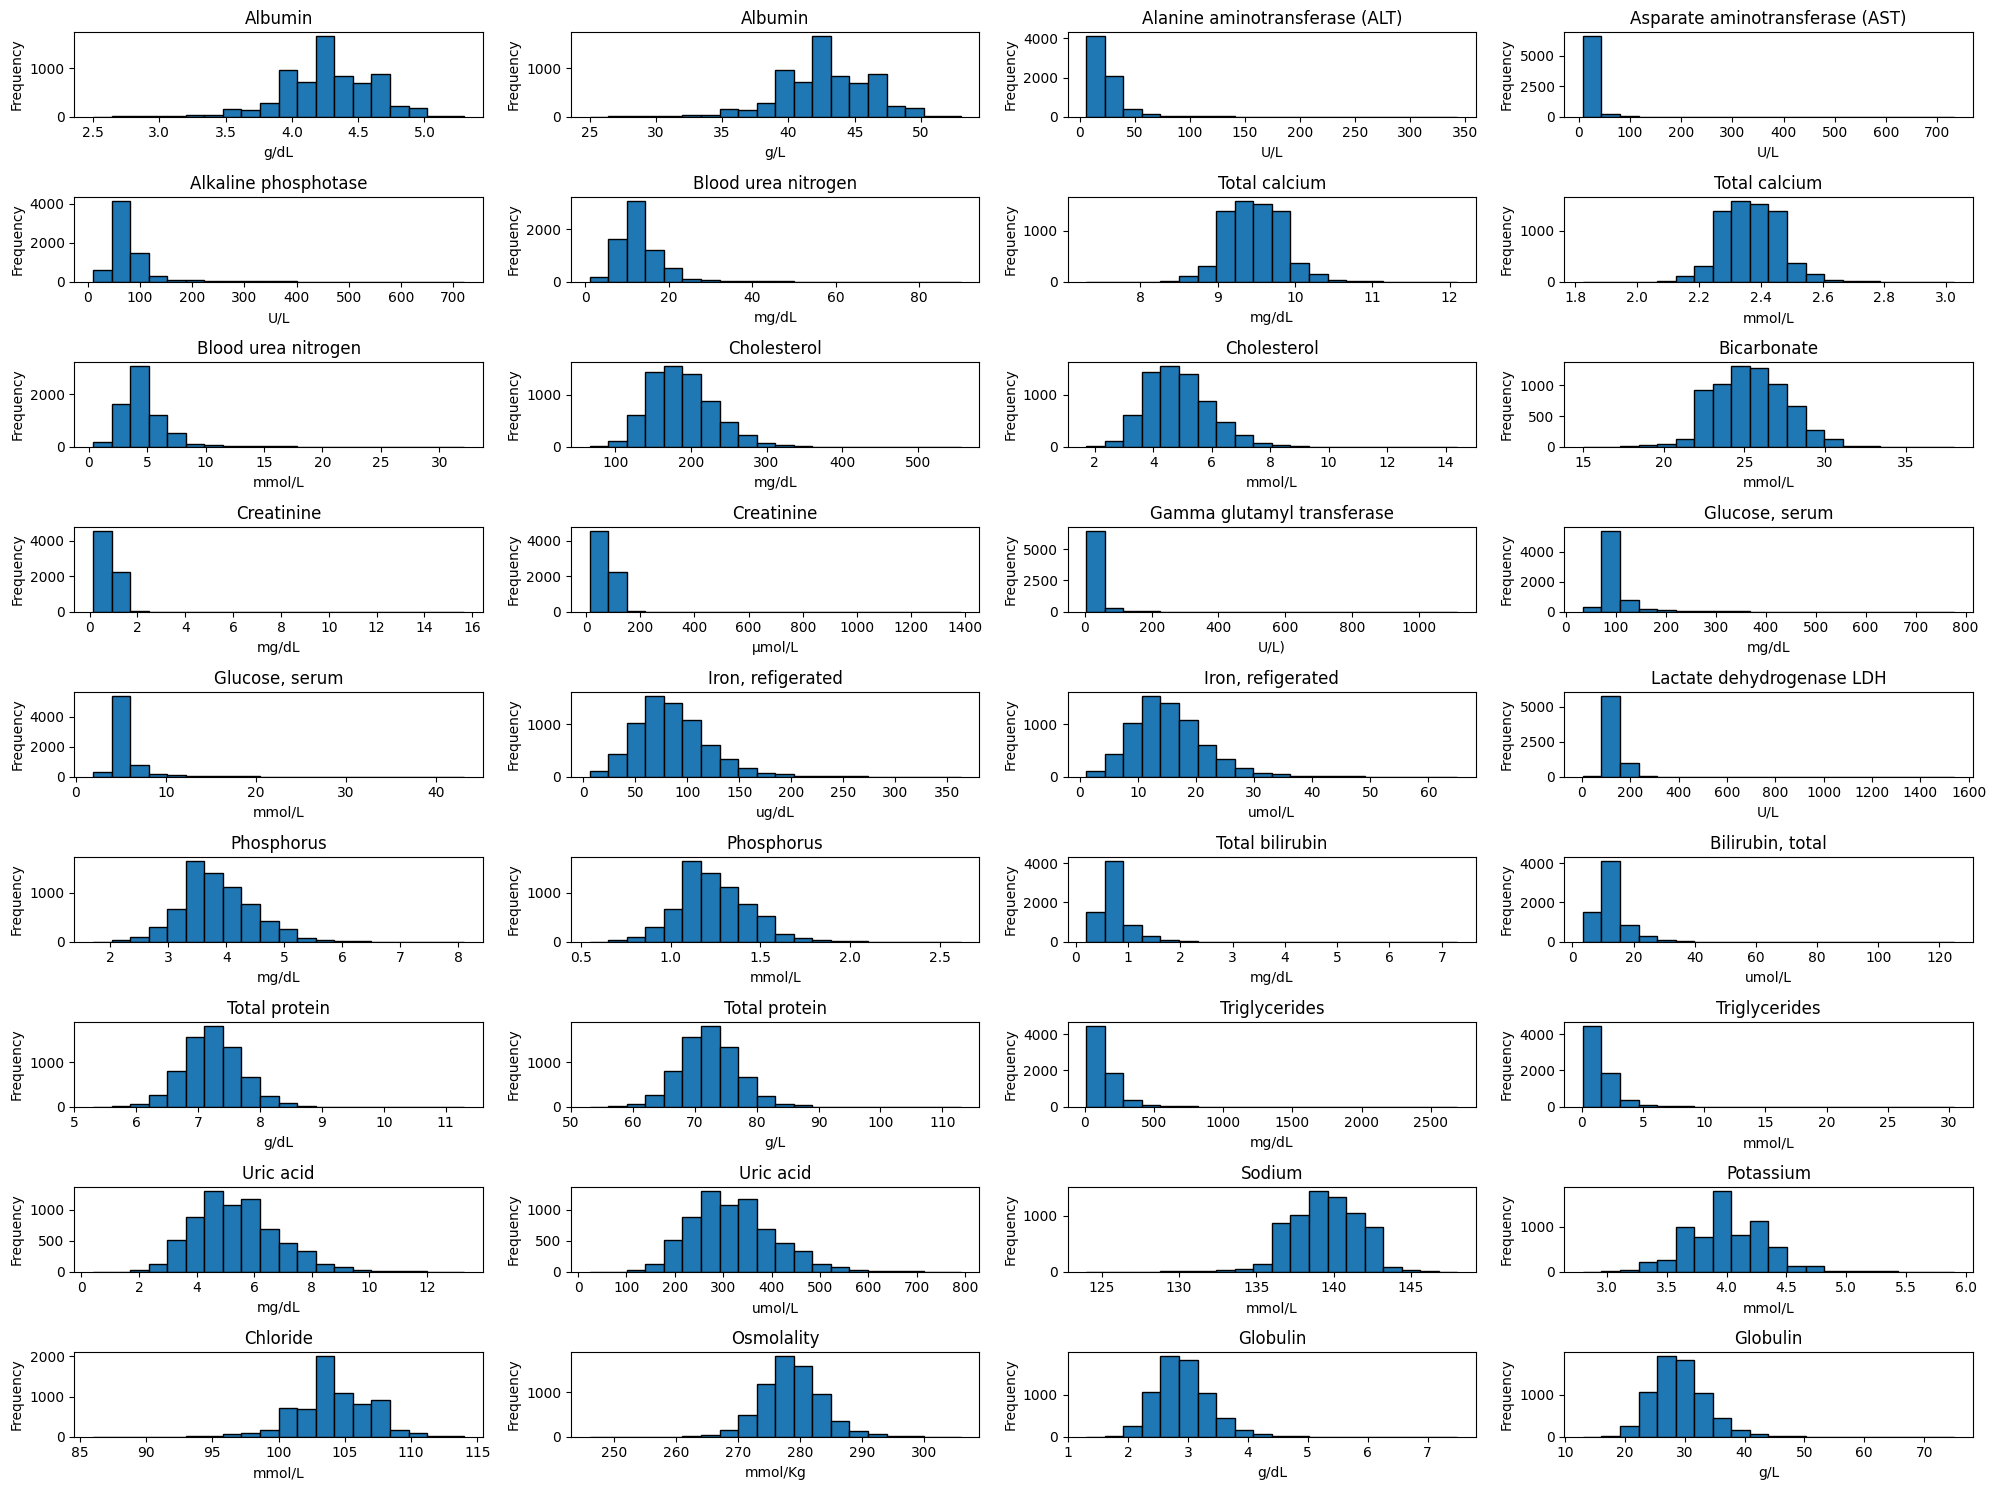

In [10]:
fig, axes = plt.subplots(9,4,figsize=(20,15))
axes = axes.flatten()

for i, (col, (name, unit)) in enumerate(metabio.items()):
    ax = axes[i]
    ax.hist(biopro[col].dropna(),bins=20,edgecolor='black')
    ax.set_title(name)
    ax.set_xlabel(unit)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()